In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [92]:
raw_data = pd.read_csv("D:/courses/ Udemy - The Data Science Course Complete Data Science Bootcamp/35 - Advanced Statistical Methods - Practical Example Linear Regression/001 1.04.Real-life-example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Numerical Data Preprocessing:

In [93]:
raw_data.describe(include = "all")
#count: each variable has different number of observations which means some data values are missing. we will remove them
#unique: over 300 dummies! it means in these were categorical values and they were converted to binary

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [94]:
#determining the variables of interest:
data = raw_data.drop(["Model"], axis = 1)   #.drop deletes a row or column, axis = 1 means column and axis = 0 means row
data.describe(include = "all")
#count: we haven't dealt with missing values yet look at count. now we will deal with missing values

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [95]:
data.isnull().sum() #shows number of observations values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [96]:
#now removing those missing observations
data_no_mv = data.dropna(axis = 0)  #for removing obsevations we write axis = 0 because they are rows
data_no_mv.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


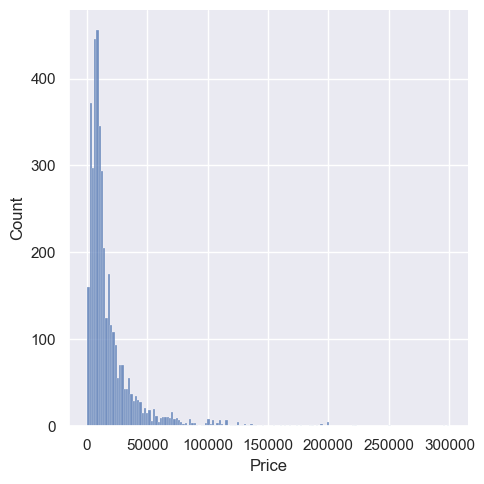

In [97]:
#showing probability distribution functions (its just a graph) of some features:
sns.displot(data_no_mv["Price"])
#we aim for normal distribution
#look at our graph its not normally distributed
#look at price mean 19k, min = 600, max = 300k which is strange
#strange becuse there are outliers on the right side of graph
#outliers = observations that lie on abnormal distance from the other observations in the data
#to deal with outliers 1 way is to remove the top 1% of observations. our goal is to get closer to mean

In [98]:
#removing the top 1% of observations to deal with outliers
q = data_no_mv["Price"].quantile(0.99)  #stores price of vehile which has 99% percentile
data_1 = data_no_mv[data_no_mv["Price"] < q]    #a new dataframce created (data_1) which stores all car prices below q
data_1.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


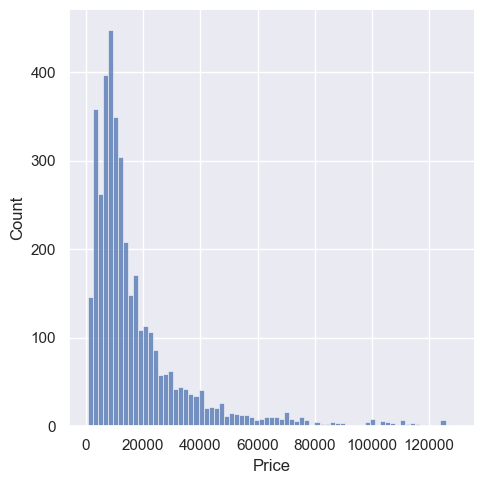

In [99]:
sns.displot(data_1["Price"])   #now max value is 129k we have gone little closer to mean
#now there are less outliers than before

In [100]:
#solving same problem for Mileage
#removing the top 1% of observations to deal with outliers
q = data_1["Mileage"].quantile(0.99)  #stores milage of vehile which has 99% percentile
data_2 = data_1[data_1["Mileage"] < q]    #a new dataframce created (data_2) which stores all car milages below q
data_2.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


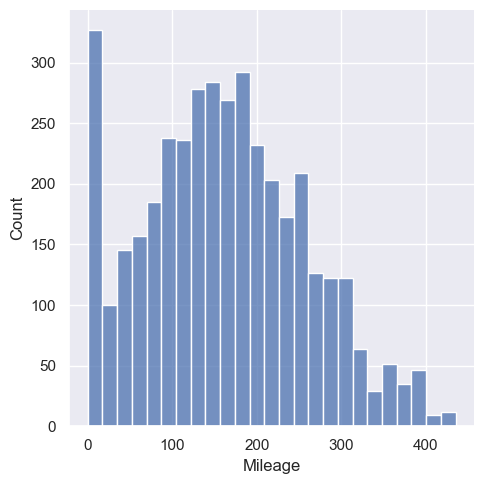

In [101]:
sns.displot(data_2["Mileage"])
#now there are less outliers than before

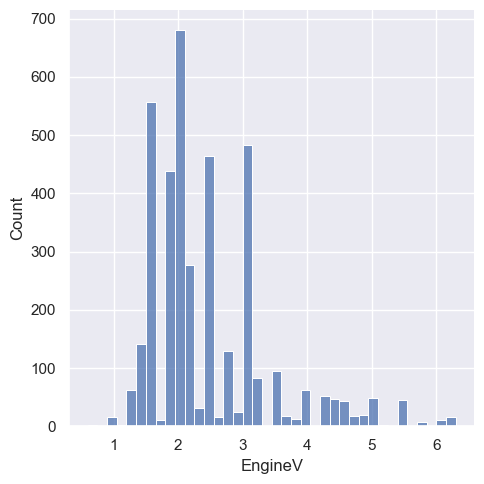

In [102]:
#solving problem for Engine Volume
data_3 = data_2[data_2["EngineV"] < 6.5]    #a new dataframce created (data_2) which stores all car engine volums below 6.5
sns.displot(data_3["EngineV"])

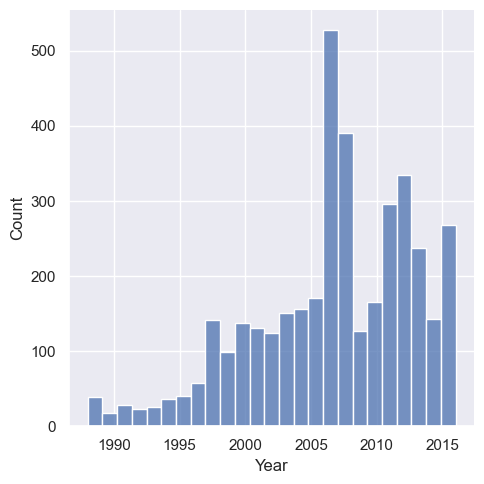

In [103]:
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"] > q]
sns.displot(data_4["Year"])

In [104]:
data_cleaned = data_4.reset_index(drop = True)  #only stores usuful indexed
data_cleaned.describe() #we deleted 250 observations

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


Checking and Relaxing the OLS Assumptions:

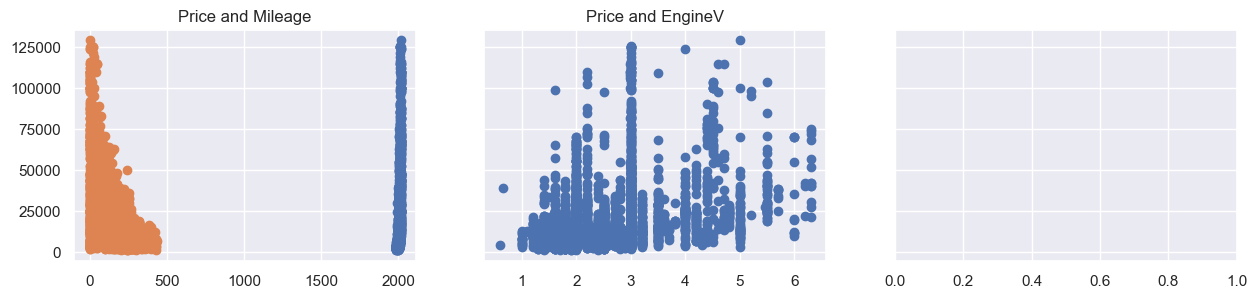

In [105]:
#only continuous values cause problems so we only deal with them such as price, year, enginev and mileage
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey= True, figsize = (15, 3))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("Price and EngineV")
ax1.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax1.set_title("Price and Mileage")
plt.show()

C:\Users\BIG BANG\AppData\Local\Temp\ipykernel_3572\1190616951.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned["Price"])


<Axes: xlabel='Price', ylabel='Density'>

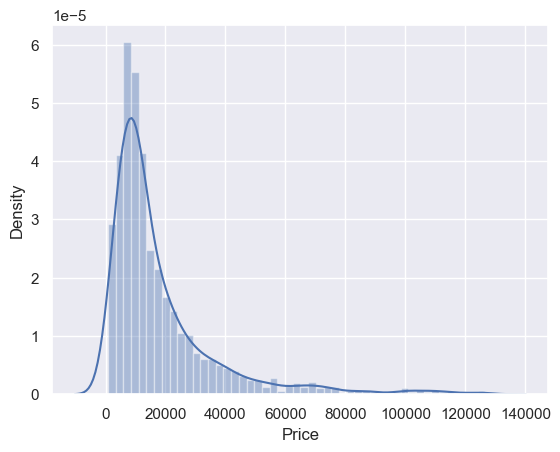

In [106]:
#price is not normaly distributed
sns.distplot(data_cleaned["Price"])

In [107]:
#there is no linear pattern among 3 graphs above so to make it linear we find log price.
#remember log can convert nonlinear relationships into linear relationships
#this is because log has property to convert multilication into addition and exponential into multiplication
#this is called logarithmic transformation
log_price = np.log(data_cleaned["Price"])   #log transformation applied here
data_cleaned["log_price"] = log_price   #a new column of log_price is added in data_cleaned dataframe
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


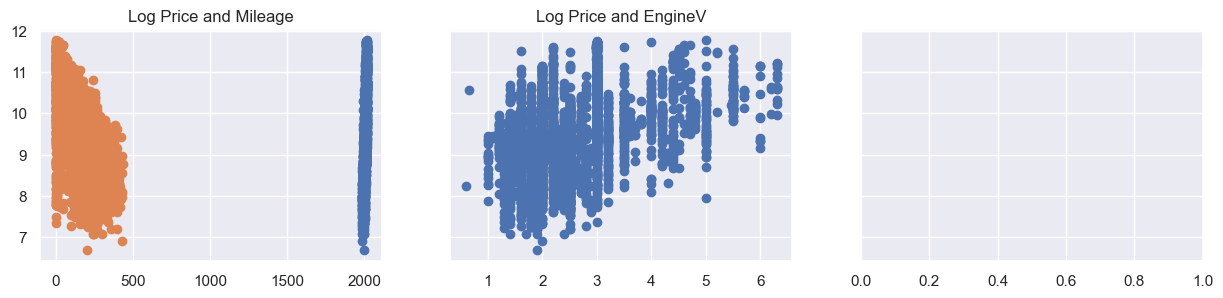

In [108]:
#now plotting 3 graphs again but now with log_price
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey= True, figsize = (15, 3))
ax1.scatter(data_cleaned["Year"], data_cleaned["log_price"])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["log_price"])
ax2.set_title("Log Price and EngineV")
ax1.scatter(data_cleaned["Mileage"], data_cleaned["log_price"])
ax1.set_title("Log Price and Mileage")
plt.show()  #now there should be linear relationship

In [109]:
#Price is no longer needed so we remove it now
data_cleaned = data_cleaned.drop(["Price"], axis = 1)

In [110]:
#now we gonna check for last assumption because other are solved or some dont need to be solved
#now we gonna solve for multicollinearity
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [111]:
#we check for multicollinearity using statsmodels. inside of statsmodels we use VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage", "Year", "EngineV"]]    #only 3 continuous values
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif #vif should not be more than 6. 7 could be acceptable but year has 10 which is too much. it means that year is too much correlated

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [112]:
#so now we gonna remove year
data_no_multicollinearity = data_cleaned.drop(["Year"], axis = 1)

Categorical Data Preprocessing (Creating Dummy Variables):

In [113]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first= True) #drop_first = True makes sure that no dummy is created for Audi 1st feature 1st category
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [114]:
#reording the columns so that the dependent variable is the first one in the dataframe
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [115]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
        'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
        'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
        'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
        'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


Standardization of Data

In [116]:
#declaring inputs and the target:
targets = data_preprocessed["log_price"]    #setting log_price as dependent variable
inputs = data_preprocessed.drop(["log_price"], axis = 1)    #setting every feature other than log_price as independent variables

In [117]:
#scaling data:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(inputs)

StandardScaler()

In [118]:
inputs_scaled = scalar.transform(inputs)
#by now we have standardized all input variables, it is not usually recommended to standardize dummy variables

Splitting Data into Training and Testing:

In [119]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)    #test_size = 0.2 means that there would be 80/20 split of data

Creating Linear Regression:

In [120]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [121]:
y_hat = reg.predict(x_train)

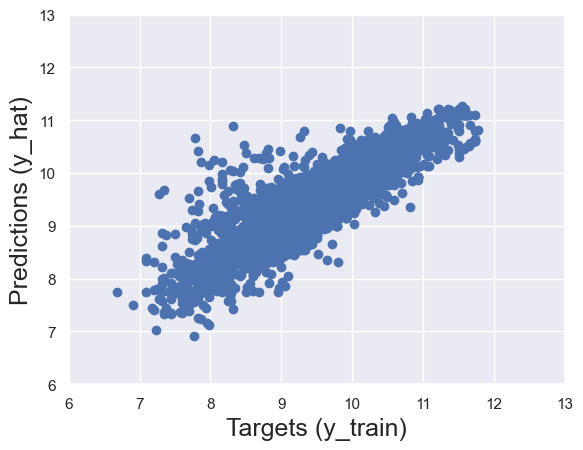

In [122]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size = 18)
plt.ylabel("Predictions (y_hat)", size = 18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

Testing:

In [123]:
y_hat_test = reg.predict(x_test)

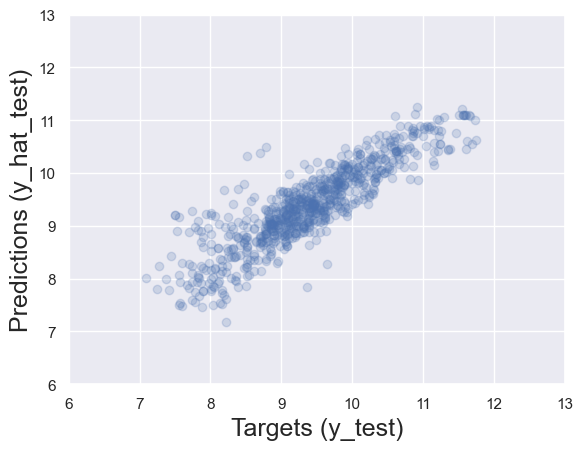

In [124]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)    #alpha turns map into a heat map, 
plt.xlabel("Targets (y_test)", size = 18)
plt.ylabel("Predictions (y_hat_test)", size = 18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [125]:
dataframe_prediction = pd.DataFrame(np.exp(y_hat_test), columns = ["Prediction"])
dataframe_prediction.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [126]:
dataframe_prediction["Target"] = np.exp(y_test)
dataframe_prediction

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [127]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [128]:
dataframe_prediction["Target"] = np.exp(y_test)
dataframe_prediction

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [129]:
dataframe_prediction["Residual"] = dataframe_prediction["Target"] - dataframe_prediction["Prediction"]
dataframe_prediction["Difference%"] = np.absolute(dataframe_prediction["Residual"] / dataframe_prediction["Target"] * 100)
dataframe_prediction

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [130]:
dataframe_prediction.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [131]:
dataframe_prediction.sort_values(by = ["Difference%"])

,Prediction,Target,Residual,Difference%
698,30480.847838,30500.0,19.152162,0.062794
742,16960.310476,16999.0,38.689524,0.227599
60,12469.207487,12500.0,30.792513,0.246340
110,25614.137960,25500.0,-114.137960,0.447600
367,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.0,-26481.045510,441.350758
162,9954.416247,1800.0,-8154.416247,453.023125
451,35956.498331,6500.0,-29456.498331,453.176897
532,10019.903027,1800.0,-8219.903027,456.661279
